<a href="https://colab.research.google.com/github/therealszymek/Tire-Model/blob/main/ML_Tire_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Important Functions:**


1.   `createDataFrame(globbing_data)`
  
      *   Function scans through .dat files from the given folder from the SAE Tire Consortium for the specific tire type, and extracts information from file to create a main dataframe of all data needed for model.  

**Libraries Used:**

1.    `pandas as pd`: https://pandas.pydata.org/docs/
      
      *   Series: https://pandas.pydata.org/docs/user_guide/dsintro.html#series
      *   DataFrame: https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe

2.    `sklearn.model_selection`: https://scikit-learn.org/stable/user_guide.html
      *   train_test_split: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html



In [1]:
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split

In [2]:
def createDataFrame(globbing_data):
    all_data_frames = []
    for one_filename in globbing_data:
        print(f'Loading {one_filename}')
        new_data_frame = pd.read_csv(one_filename, delimiter='\t', skiprows=[0, 2])
        all_data_frames.append(new_data_frame)

    print(f'{len(all_data_frames)} files added.')

    data_frame = pd.concat(all_data_frames)
    return data_frame

**Important Script Information:**


1.   Initially, a data frame is initialized, and then split into `train_data` and `test_data` (80% of data, and 20% of data) dataframes.


2.   Next, using the `train_data` dataframe, the following columns are extracted for model training.
      *   Input Parameters:
          1.   Ground Speed Velocity: `groundSpeedVelocity`
          2.   Slip Angle: `slipAngle`
          3.   Inclination Angle: `inclinationAngle`
          4.   Tire Pressure: `tirePressure`
          5.   Tire Load: `tireLoad`
          6.   Slip Ratio: `slipRatio`

      *   Output Parameters:
          1.   Lateral Load: `tireLateralLoad`
          2.   Longitudinal Load: `tireLongitudinalLoad`
          3.   Rolling Resistance: `rollingResistance`
          4.   Self Aligning Torque: `selfAligningTorque`

3.   Next, wheel rotation is converted from RPM to rad/s. The slip ratio column is finalized through the wheel rotation conversion.

4.   Next, the input`input_data `variable is defined through the input parameter column stacking, and `output_data ` variable is defined through output parameter column stacking aswell.

5.   Finally, data is split into four variables:
          
          *   input_train, input_test
          *   output_train, output_test


**Libraries Used:**
1.    `import glob`: https://docs.python.org/3/library/glob.html
2.    `import numpy as np`: https://numpy.org/doc/stable/user/index.html

In [3]:
import glob
import numpy as np

In [4]:
globbing_data = glob.glob('/content/data/A2356*.dat')
data_frame = createDataFrame(globbing_data)

Loading /content/data/A2356raw2.dat
Loading /content/data/A2356raw4.dat
2 files added.


In [5]:
groundSpeedVelocity = data_frame['V']
slipAngle = data_frame['SA']
inclinationAngle = data_frame['IA']
tirePressure = data_frame['P']
tireLoad = data_frame['FZ']

data_frame['N'] = (data_frame['N'] * 2 * np.pi) / 60    #converts wheel rotational speed from RPM to radians/sec
data_frame['RL'] = data_frame['RL'] / 100   #converts loaded radius in cm to m
slip_ratio_values = np.where(data_frame['V'] != 0, (data_frame['N'] * data_frame['RL']) / data_frame['V'], 0)

slipRatio = pd.Series(slip_ratio_values, name='SR')
print('input parameters extracted, slip ratio finalized.')

tireLateralLoad = data_frame['NFY']
tireLongitudinalLoad = data_frame['NFX']
rollingResistance = data_frame['MX']
selfAligningTorque = data_frame['MZ']
print('output parameters extracted.')

input parameters extracted, slip ratio finalized.
output parameters extracted.


In [6]:
input_data = np.column_stack((groundSpeedVelocity, slipAngle, inclinationAngle, tirePressure, tireLoad, slipRatio))
output_data = np.column_stack((tireLateralLoad, tireLongitudinalLoad, rollingResistance, selfAligningTorque))

In [7]:
input_train, input_test, output_train, output_test = train_test_split(input_data, output_data, test_size=0.2, random_state=42)

**Important Script Information:**


In [8]:
from keras.models import Sequential
from keras.layers import Dense

In [9]:
model = Sequential()
model.add(Dense(64, input_dim=6, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4))

In [10]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [11]:
trained_model = model.fit(input_train, output_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
4142/4142 [==============================] - 12s 3ms/step - loss: 25.6353 - mae: 2.1714 - val_loss: 18.4728 - val_mae: 1.7631
Epoch 2/100
4142/4142 [==============================] - 11s 3ms/step - loss: 18.2402 - mae: 1.6854 - val_loss: 18.5779 - val_mae: 1.7755
Epoch 3/100
4142/4142 [==============================] - 10s 2ms/step - loss: 17.5554 - mae: 1.5871 - val_loss: 15.9981 - val_mae: 1.4210
Epoch 4/100
4142/4142 [==============================] - 11s 3ms/step - loss: 17.1281 - mae: 1.5282 - val_loss: 15.6857 - val_mae: 1.3903
Epoch 5/100
4142/4142 [==============================] - 11s 3ms/step - loss: 16.9013 - mae: 1.4965 - val_loss: 18.3274 - val_mae: 1.7086
Epoch 6/100
4142/4142 [==============================] - 11s 3ms/step - loss: 16.6604 - mae: 1.4796 - val_loss: 16.2113 - val_mae: 1.4848
Epoch 7/100
4142/4142 [==============================] - 10s 2ms/step - loss: 16.4821 - mae: 1.4603 - val_loss: 15.6981 - val_mae: 1.3836
Epoch 8/100
4142/4142 [===========

In [12]:
# Model Evaluation:
loss, mae = model.evaluate(input_test, output_test)
print(f'Test Loss: {loss}, Test MAE: {mae}')

1295/1295 [==============================] - 2s 2ms/step - loss: 18.7687 - mae: 1.3260
Test Loss: 18.768718719482422, Test MAE: 1.3259751796722412


In [13]:
# Prediction Outputs:
output_predictions = model.predict(input_test)

1295/1295 [==============================] - 2s 1ms/step


**TESTING W+CODE**


░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░
░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░███░░░░░░░░░░
░░░░░░░░░░░░░░███████████████░░░░█░░░░░░░░░░░
░░░░░░░░░░░░░░█░░░░░░░░░░░░░█░░░░█░░░░░░░░░░░
░░░░░░░░░░░████░░██░░░░██░░░████░█░░░░░░░░░░░
░░░░░░░░░░░█░░█░░██░░░░██░░░█░░█░█░░░░░░░░░░░
░░░░░░░░░░░█░░█░░░░░░░░░░░░░█░░███░░░░░░░░░░░
░░░░░░░░░░░█░░█░░█░█░█░█░█░░█░░█░░░░░░░░░░░░░
░░░░░░░░░░░████░░░░░░░░░░░░░████░░░░░░░░░░░░░
░░░░░░░░░░░░░░███████████████░░░░░░░░░░░░░░░░
░░░░░░░░░░░░░░░░░█░░░░░░█░░░░░░░░░░░░░░░░░░░░
░░░░░░░░░░░░░░░░░█░░░░░░█░░░░░░░░░░░░░░░░░░░░
░░░░░░░░░░████████████████████████░░░░███░░░░
░░░░░░░░░░█░░░░░░░░░░░░░░░░░░░░░█░█████░█░░░░
░░░░░░░░░░█░░░░░█░░░░░░░░███░░░██░█░░░░░█░░░░
░░░░░░░░░░█░░░░██░░░░█░░░███░░░█░░███████░░░░
░░░░░░░░░░██░░░█░░░░█░░░░███░░░█░░████░░░░░░░
░░░░░░░░░░░█░░░██░░██░░░░░░░░░██░██░░█░░░░░░░
░░░░░░░░░░░█░░██████░░░░░░░░░░░███░░░█░░░░░░░
░░░░░░░░░░░█████░░░░░░░░░░░░░░░██░░███░░░░░░░
░░░░░░░░░░░██░░█░░░░░░░░░░░░░░░░░███░░░░░░░░░
░░░░░░░░░██░████░░░░░░░░░░░░░█████░░░░░░░░░░░
░░░░░░░░░░░██░░░░░░░░░░░░░░███░░░░░░░░░░░░░░░
░░░░░░░░░░░████░░█░████░█░█░█░░░░░░░░░░░░░░░░
░░░░░░░░░░█░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░
░░░░░░░░░░█░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░
░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░
░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░
░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░










In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [15]:
x_axis = input_test[0:, 1]
y_axis = input_test[0:, 4]
z_axis = output_predictions[0:, 0]

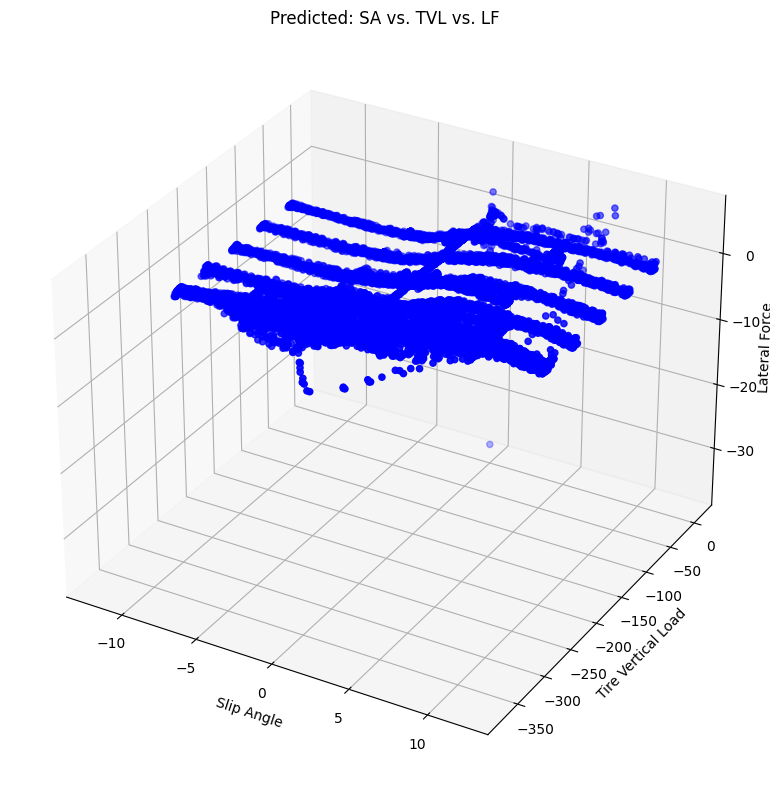

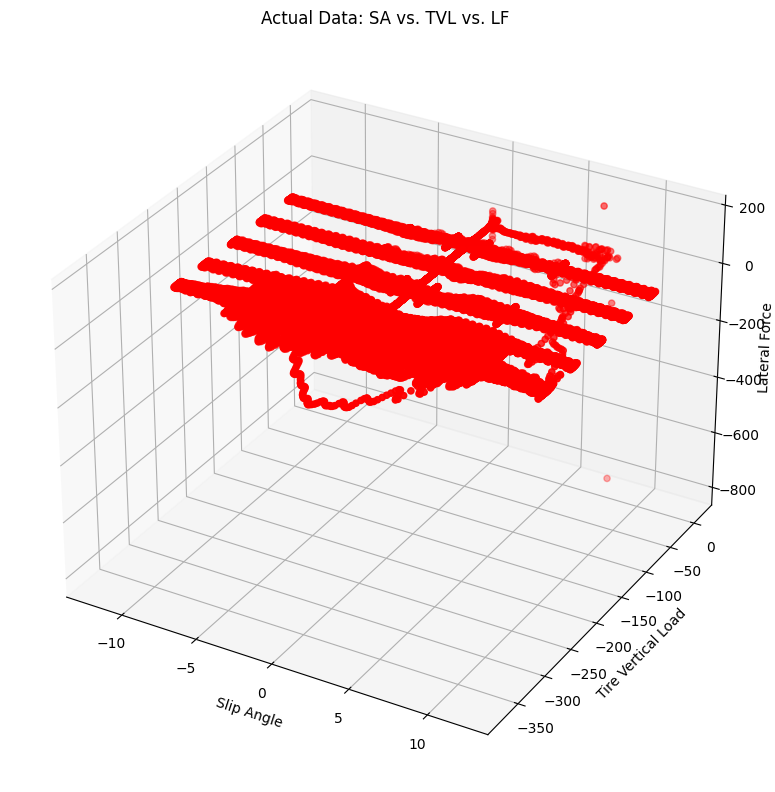

In [16]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x_axis, y_axis, z_axis, c='b', marker='o')
ax.set_xlabel('Slip Angle')
ax.set_ylabel('Tire Vertical Load')
ax.set_zlabel('Lateral Force')
ax.set_title('Predicted: SA vs. TVL vs. LF')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.tight_layout(pad=1.0)
ax.zaxis.labelpad = 0  # Increase padding for z-axis label
plt.show()

figg = plt.figure(figsize=(12, 8))
axx = figg.add_subplot(111, projection='3d')
scc = axx.scatter(slipAngle, tireLoad, tireLateralLoad, c='r', marker='o')
axx.set_xlabel('Slip Angle')
axx.set_ylabel('Tire Vertical Load')
axx.set_zlabel('Lateral Force')
axx.set_title('Actual Data: SA vs. TVL vs. LF')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.tight_layout(pad=1.0)
axx.zaxis.labelpad = 0  # Increase padding for z-axis label
plt.show()